## The intersection utilized GeoPandas
---
### Xiaomeng

In [1]:
%matplotlib inline
from __future__ import print_function, division
import pandas as pd
import geopandas as gpd
from matplotlib.pylab import plt
from fiona.crs import from_epsg

### 1. Reading the datasets of different boundaries.

#### 2011 Supervisorial District Boundaries (Official)


In [2]:
# http://egis3.lacounty.gov/dataportal/2011/12/06/supervisorial-districts
filepath = '/Users/DXM/Documents/ARGO/ops'

supervisor = gpd.read_file(filepath + '/DPW-Supervisorial-District/sup_dist_2011.shp')
sup = supervisor.to_crs(epsg=4269)
sup = gpd.GeoDataFrame(supervisor)

#### PUMA from Census Data

In [3]:
# https://www.census.gov/geo/maps-data/data/cbf/cbf_puma.html

puma = gpd.read_file(filepath + '/cb_2016_06_puma10_500k/cb_2016_06_puma10_500k.shp')
pu = puma.to_crs(epsg=4269)
pu = gpd.GeoDataFrame(puma)

#### Health Districts (HD) – 2012

In [4]:
# http://egis3.lacounty.gov/dataportal/2012/03/01/health-districts-hd-2012/

health = gpd.read_file(filepath + '/HD_20121/Health_Districts_2012.shp')
hd = health.to_crs(epsg=4269)
hd = gpd.GeoDataFrame(health)

#### School District Boundaries (2011)

In [5]:
# http://egis3.lacounty.gov/dataportal/wp-content/uploads/2012/01/rrcc_school_districts1.zip

school = gpd.read_file(filepath + '/rrcc_school_districts1/rrcc_school_districts.shp')
sdb = school.to_crs(epsg=4269)
sdb = gpd.GeoDataFrame(school)

#### California State Senate Districts (2011)

In [6]:
# http://egis3.lacounty.gov/dataportal/2011/11/08/california-state-senate-districts-2011/

senate = gpd.read_file(filepath + '/state-senate-2011/senate.shp')
se = senate.to_crs(epsg=4269)
se = gpd.GeoDataFrame(senate)

#### US Congressional Districts

In [7]:
# http://egis3.lacounty.gov/dataportal/2010/01/14/us-congressional-districts/

congression = gpd.read_file(filepath + '/RRCC_CONGRESSIONAL_DISTRICTS/RRCC_CONGRESSIONAL_DISTRICTS.shp')
con = congression.to_crs(epsg=4269)
con = gpd.GeoDataFrame(congression)

#### California State Assembly Districts (2011)

In [8]:
# http://egis3.lacounty.gov/dataportal/2011/11/08/california-state-assembly-districts-2011/

assembly = gpd.read_file(filepath + '/state_assembly_districts/state_assembly_districts.shp')
asse = gpd.GeoDataFrame(assembly)

#### Registrar Recorder Precincts

In [9]:
#http://egis3.lacounty.gov/dataportal/wp-content/uploads/ShapefilePackages/RRCC_PRECINCTS.zip

registar = gpd.read_file(filepath + '/RRCC_PRECINCTS/RRCC_PRECINCTS.shp')
registar = registar.to_crs(epsg=4269)
rrp = gpd.GeoDataFrame(registar)

#### Law Enforcement Reporting Districts

In [10]:
#http://egis3.lacounty.gov/dataportal/wp-content/uploads/ShapefilePackages/LACOUNTY_LAW_ENFORCEMENT_RDs.zip

filepath = '/Users/DXM/Documents/ARGO/ops'
law_enforcement = gpd.read_file(filepath + '/LACOUNTY_LAW_ENFORCEMENT_RDs/LACOUNTY_LAW_ENFORCEMENT_RDs.shp')
law = law_enforcement.to_crs(epsg=4269)
law = gpd.GeoDataFrame(law_enforcement)

#### LAcounty_COMMUNITIES

In [11]:
#http://egis3.lacounty.gov/dataportal/wp-content/uploads/2010/10/Communities1.zip

community = gpd.read_file(filepath + '/Communities1/Communities.shp')
community = community.to_crs(epsg=4269)
co = gpd.GeoDataFrame(community)

#### Census Block (2010)

In [12]:
#http://egis3.lacounty.gov/dataportal/wp-content/uploads/ShapefilePackages/CENSUS_BLOCKS_2010.zip

blocks = gpd.read_file(filepath + '/CENSUS_BLOCKS_2010/CENSUS_BLOCKS_2010.shp')
blocks = registar.to_crs(epsg=4269)
bl = gpd.GeoDataFrame(blocks)

### 2. Intersections of Polygons

sup: 2011 Supervisorial District Boundaries (Official)

pu: PUMA from Census Data

hd: Health Districts (HD) – 2012

sdb: School District Boundaries (2011)

se: California State Senate Districts (2011)

con: US Congressional Districts

asse: California State Assembly Districts (2011)

rrp: Registrar Recorder Precincts

law: Law Enforcement Reporting Districts

co: LAcounty_COMMUNITIES

bl: Census Block (2010)

####  Step 1: 2011 Supervisorial District Boundaries (Official) vs PUMA from Census Data

In [13]:
sup_pu = gpd.sjoin(sup, pu, how='inner', op='intersects')

In [14]:
sup_pu.head()

,OBJECTID,SUP_DIST_N,SYMBOL,PERIMETER,AREA_SQ_MI,SHAPE_AREA,SHAPE_LEN,geometry,index_right,STATEFP10,PUMACE10,AFFGEOID10,GEOID10,NAME10,LSAD10,ALAND10,AWATER10


##### The final dataframe of the intersection of these two datasets is empty. 

#### Step 2: Health Districts (HD) – 2012 VS School District Boundaries (2011)

In [15]:
sdb_hd = gpd.sjoin(sdb, hd, how = 'inner', op='intersects')

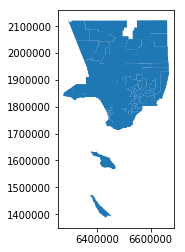

In [16]:
sdb_hd.plot()

#### Step 3: California State Senate Districts (2011) VS US Congressional Districts

In [18]:
se_con = gpd.sjoin(con, se, how='inner', op='intersects')

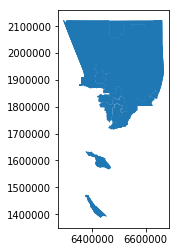

In [19]:
se_con.plot()

#### Step 4: Law Enforcement Reporting Districts VS Registrar Recorder Precincts

In [20]:
rrp_law = gpd.sjoin(rrp, law, how = 'inner', op='intersects' )

In [21]:
rrp_law.head()

,PRECINCT,CITY_EST,SUBCODE,MAP1,DIST_RES,DIST_CONG,DIST_STSEN,DIST_STASS,DIST_SUP,DIST_MCRT,...,PRC_NAME,CITY,ESTAB,Shape_STAr,Shape_STLe,geometry,index_right,RD,Name,Layer


##### The final dataframe of the intersection of these two datasets is empty.

#### Step 5: LAcounty_COMMUNITIES VS Census Block (2010)

In [22]:
bl_co = gpd.sjoin(bl, co, how='inner', op='intersects')

/Users/DXM/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2815: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


In [23]:
bl_co.head(1)

,PRECINCT,CITY_EST,SUBCODE,MAP1,DIST_RES,DIST_CONG,DIST_STSEN,DIST_STASS,DIST_SUP,DIST_MCRT,...,PO_NAME,STATNAME,X_CENTER,Y_CENTER,ST_NAME,LABEL_CITY,LABEL_COMM,AREA_SQMI,Shape_area,Shape_len
0,9001742B,9001742,B,0.0,,34.0,24.0,53.0,1.0,,...,Westlake,Westlake,6480748,1840344,LAPD Rampart Division,Los Angeles,Westlake,3.586,9.996066e+07,55044.330496


### After selecting the efficient datasets to perform the intersection, I choose four datasets as LAcounty_COMMUNITIES, Registrar Recorder Precincts, Census Block (2010), School District Boundaries.

#### Step 6: Perform the final intersection of four datasets above.

In [20]:
rrp_co = gpd.sjoin(rrp, co, how='inner', op='intersects')

/Users/DXM/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2815: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


/Users/DXM/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


Text(0.5,1,'Boundaries of LA County')

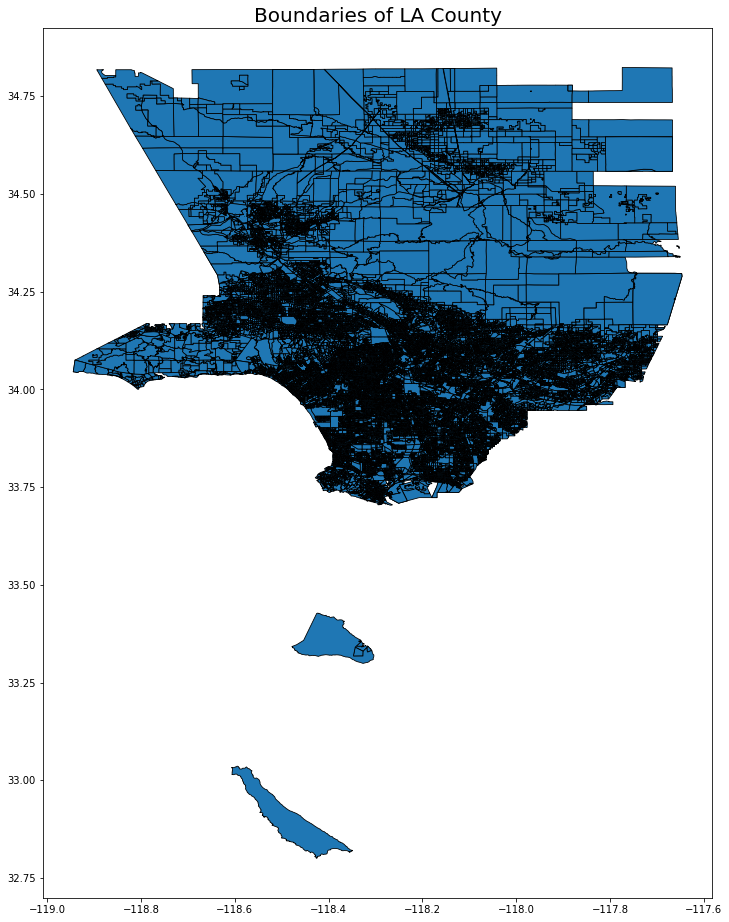

In [21]:
fig, ax = plt.subplots(figsize=(12,16))
rrp_co.plot(linewidth=0.8, alpha=1, axes=ax, edgecolor = 'k')
ax.set_title('Boundaries of LA County', fontsize=20)

In [22]:
bl_sdb = gpd.sjoin(bl, sdb, how='inner', op='intersects')

/Users/DXM/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2815: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


/Users/DXM/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


Text(0.5,1,'Boundaries of LA County')

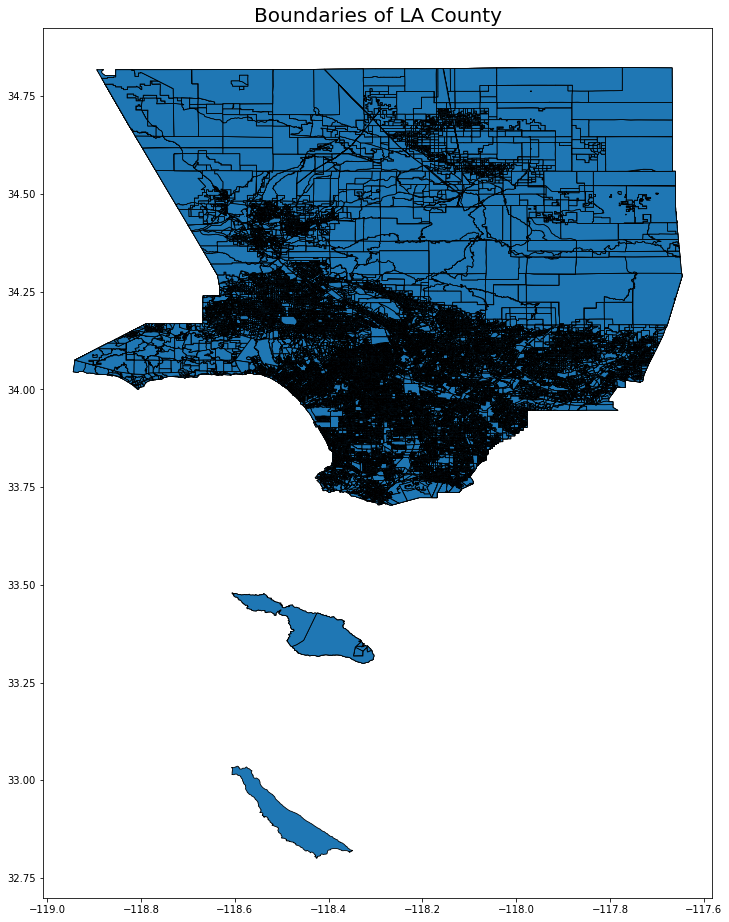

In [23]:
fig, ax = plt.subplots(figsize=(12,16))
bl_sdb.plot(linewidth=0.8, alpha=1, axes=ax, edgecolor = 'k')
ax.set_title('Boundaries of LA County', fontsize=20)

In [24]:
bl_sdb = bl_sdb.drop(['index_right'], axis=1)

In [25]:
rrp_co = rrp_co.drop(['index_right'], axis=1)

In [26]:
intersection = gpd.sjoin(bl_sdb, rrp_co, how='inner', op='intersects')

/Users/DXM/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2815: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


In [27]:
intersection.shape

(1876445, 336)

/Users/DXM/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


Text(0.5,1,'Intersected Boundaries of LA County')

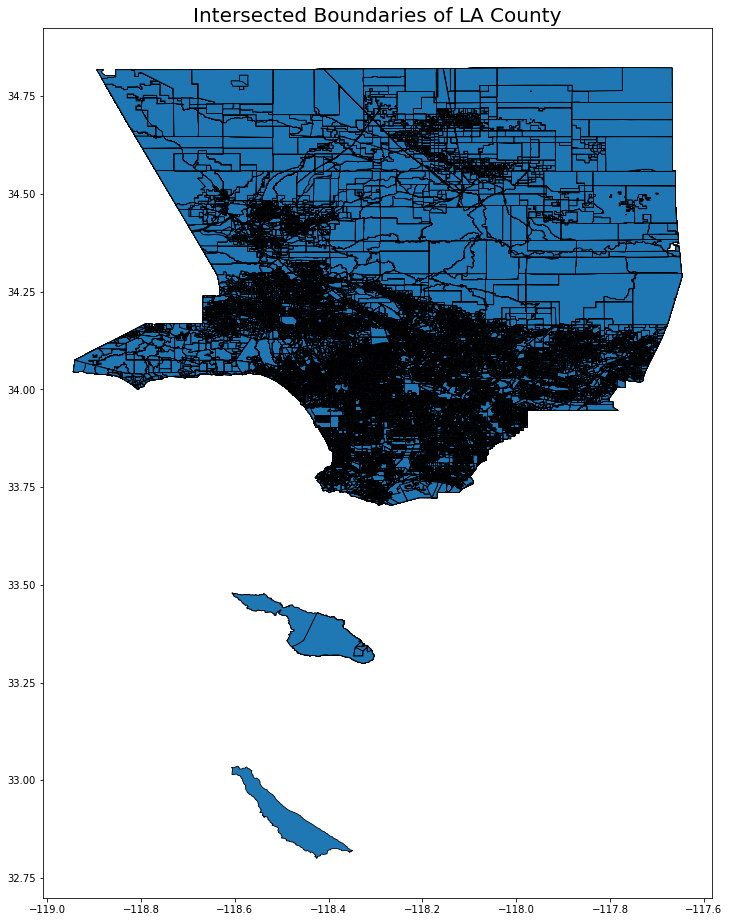

In [29]:
fig, ax = plt.subplots(figsize=(12,16))
intersection.plot(linewidth=0.8, alpha=1, axes=ax, edgecolor = 'k')
ax.set_title('Intersected Boundaries of LA County', fontsize=20)